# Business problem and Introduction:-
In 21 st century 80-90%  peoples are suffered from dental problems and early research shows that the dental problem is related to the cavity. Nowadays peoples are so much busy in their work hence they do not care about themselves this leads to health problems including dental problems. Early diagnosis is very important for maintaining dental problems. Dentists use laser-technology for diagnosis of cavity this is very costly and these results are highly negative that dentists do not rely on results instead they relying on visual inspection. Artificial intelligence helps for identifying dental problems and also it predicts better solutions with the help of dentists to the patients.
 <img alt="Qries" src="https://www.toothncare.com.au/images/slide_04.jpg">
<br>
    Artificial intelligence helps for identifying dental problems and also it predicts better solutions with the help of dentists to the patients. dentists to the patients. Artificial Intelligence has more power to save a large amount of data which is useful for individuals need. Artificial Intelligence fill the gap between doctors and laser-techniques




# Cavity Types:-
 <img alt="Qries" src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRtJD8NvqnfYhiIKk0b0BZyv7MpCEziYPEDJ0ci5Y-uCukBOm5d">
<br>


Machine learning is the field of artificial intelligence which helps to analyze the function of the brain using an artificial neural network. Deep learning is a subfield of machine learning. Deep learning is an intelligent technique to work on a huge amount of data for better performance and forecasting.It is used to build an intelligent computer system which can learn complex function mapping the input to output directly from data without depending on human-crafted features

# Problem Statement
Here We have to classify the the images as per cavities. There are total 6 types of cavities. based on this six type we have to classify or predict the probabilities of per classes

## Data Collection :<br>
Data will be collected using the following methods<br>
<b>a.Primary Data:</b> Data regarding tooths and dental disease are collected from various dentists <br>
<b>b.Secondary Data:</b>Data about Artificial intelligence will be collected from research journals and e-resources
	The Collected Data can be stored in our own server with there location (path) in csv format. We collected total upto  300 images of cavities
  <br>
   <img alt="Qries" src=" https://pocketdentistry.com/wp-content/uploads/2017/04/image00802.jpeg">
<br>


# Techniques Used
1. Fast.ai
2. Cnn
# What is Fast.ai:-
(https://www.fast.ai)
<br>
Fastai library is pretty new, but it's getting an extraordinary amount of traction. It's making a lot of things a lot easier, but it's also making new things possible. So really understanding the fastai software is something which is going to take you a long way.<br>
So how does it compare? There's only one major other piece of software like fastai that tries to make deep learning easy to use and that's Keras. Keras is a really terrific piece of software, we actually used it for the previous courses until we switch to fastai. It runs on top of Tensorflow. 
<br>
It was the gold standard for making deep learning easy to use before. But life is much easier with fastai. So if you look at the last year's course exercise which is getting dogs vs. cats, fastai lets you get much more accurate (less than half the error on a validation set), training time is less than half the time, lines of code is about 1/6. The lines of code are more important than you might realize because those 31 lines of Keras code involved you making a lot of decisions, setting lots of parameters, doing lots of configuration. 


# Importing Fast.ai

In [0]:
from fastai.vision import *
import numpy as np
import pandas as pd

In [0]:
#Making Saperate folders for each classes
folders = ['Class-I', 'Class-II']
files = ['Class-I', 'Class-II']

In [0]:
classes = ['Class-I','Class-II']
path = Path('data/Cavity')

# Creating Folder Structure
folder_structure<br>
Data:-->Cavity-->Class-I<br>
Data:-->Cavity-->Class-II


In [0]:

#for file, folder in [('Class-I.csv', 'Class-I'), ('Class-II.csv', 'Class-II')
#                     ]:
#    dest = path/folder # path + '/' + folder
#    dest.mkdir(parents=True, exist_ok=True)
#    download_images(path/file, dest)

In [8]:
import sys
data=os.listdir("data/Cavity/Class-II")
len(data)

149

In [12]:
dir_path = "data/Cavity/"
for i in os.listdir(dir_path):
    print("No of Images in ",i," category is ",len(os.listdir(os.path.join(dir_path,i))))

No of Images in  Class-II  category is  149
No of Images in  .ipynb_checkpoints  category is  0
No of Images in  Class-I  category is  136


In [0]:
##Getting size of images
#import openCV
import cv2
list_of_heights = []
list_of_widths = []
for i in os.listdir(dir_path):
    for image in os.listdir(os.path.join(dir_path,i)):
        img = cv2.imread(os.path.join(os.path.join(dir_path,i),image), cv2.IMREAD_UNCHANGED)
        # get dimensions of image
        shape = img.shape
        list_of_heights.append(shape[0])
        list_of_widths.append(shape[1])     

Text(0.5, 1.0, 'heights')

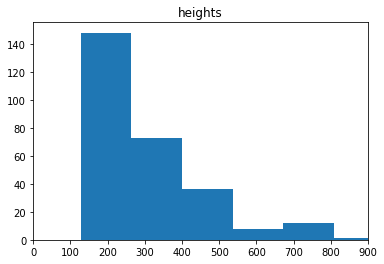

In [14]:
##plotting 
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(list_of_heights,bins=20)
plt.xlim(0,900)
plt.title('heights')

(0, 900)

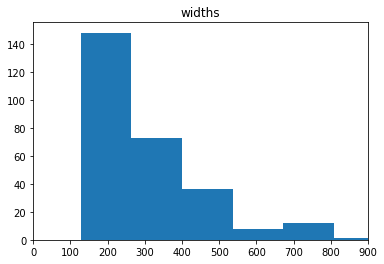

In [15]:
plt.hist(list_of_heights,bins=20)
plt.title('widths')
plt.xlim(0,900)

In [0]:
import numpy as np
#np.random.seed(4)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [17]:
data.classes

['Class-I', 'Class-II']

# Displaying Some random images

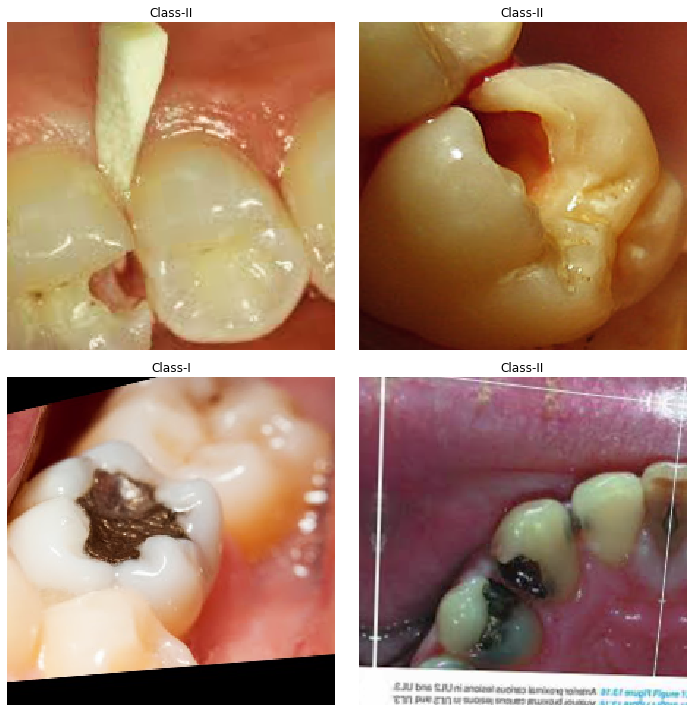

In [18]:
data.show_batch(rows=2, figsize=(10,10))

# Model Architecture(resnet34)<br>
 <img alt="Qries" src="https://miro.medium.com/max/1872/1*Y-u7dH4WC-dXyn9jOG4w0w.png">

One of the problems ResNets solve is the famous known vanishing gradient. This is because when the network is too deep, the gradients from where the loss function is calculated easily shrink to zero after several applications of the chain rule. This result on the weights never updating its values and therefore, no learning is being performed.
With ResNets, the gradients can flow directly through the skip connections backwards from later layers to initial filters.

In [19]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Class-I', 'Class-II'], 2, 228, 57)

In [59]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [60]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


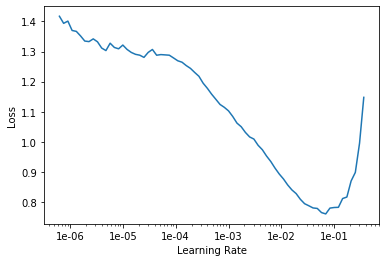

In [61]:
learn.recorder.plot()

In [62]:
interp = ClassificationInterpretation.from_learner(learn)

In [63]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.190357,2.214935,0.561404,0.438596,00:04
1,0.987534,2.551560,0.438596,0.561404,00:04
2,0.910109,1.081555,0.280702,0.719298,00:04
3,0.751484,0.830421,0.192982,0.807018,00:04
4,0.694386,0.791543,0.210526,0.789474,00:04


In [0]:
losses,idxs = interp.top_losses()

#len(data.valid_ds)==len(losses)==len(idxs)

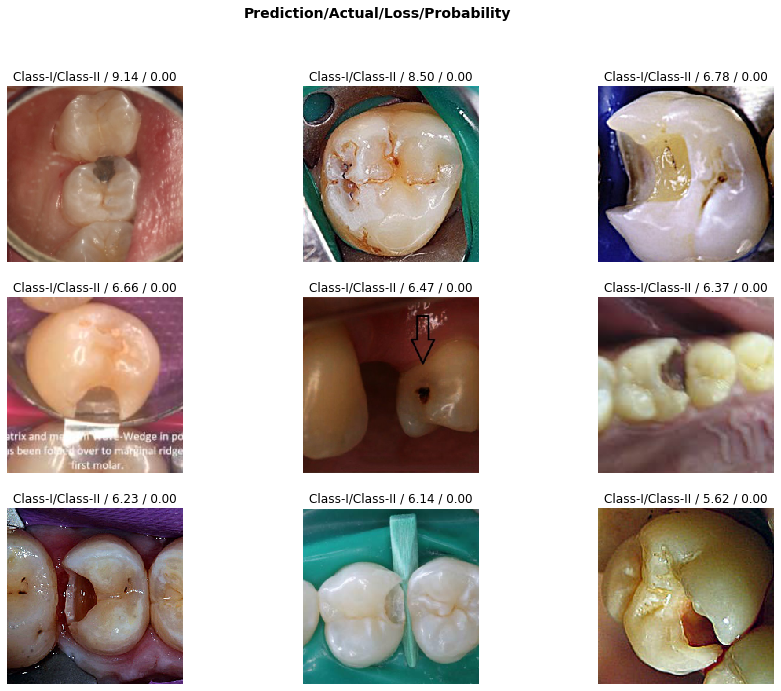

In [65]:
interp.plot_top_losses(9, figsize=(15,11))

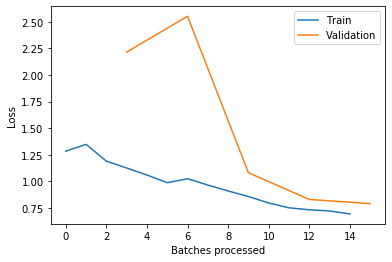

In [66]:
learn.recorder.plot_losses()

# Confusion Matrix

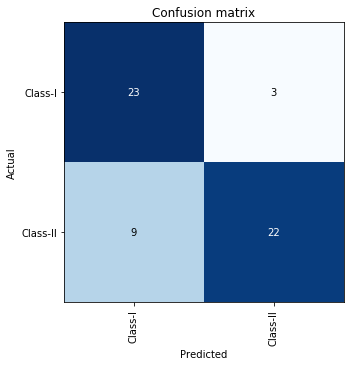

In [44]:
interp.plot_confusion_matrix(figsize=(5,5))

# Exporting the model:-

In [0]:
learn.export()

# Loading the model and predicting single point

In [0]:
defaults.device = torch.device('cpu')

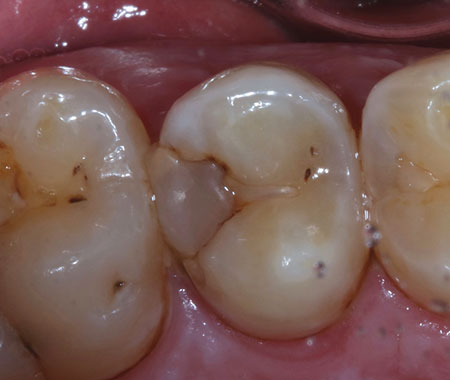

In [49]:
img = open_image('Test5.jpg')
img

In [0]:
learn = load_learner(path)

In [51]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class
#outputs
#pred_idx

Category Class-II

Here we get correct results. the above image is from class-II

# Finding Most Confused Images

In [52]:
interp.most_confused()

[('Class-II', 'Class-I', 9), ('Class-I', 'Class-II', 3)]

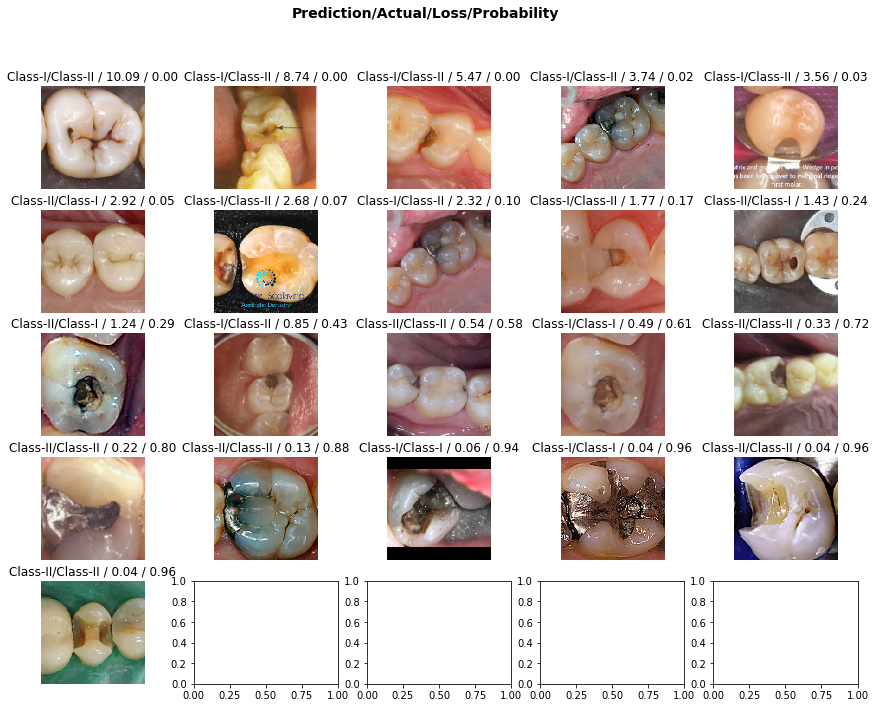

In [53]:
interp.plot_top_losses(21, figsize=(15,11), heatmap=False)

<b>From Above we are able to find the incorrect formatted images so we can remove that images from original dataset

In [54]:
verify_images(path, delete=True, max_size=500)

/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:105: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
